In [1]:
import os
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

from tqdm import tqdm
from g2p_en import G2p
from config import Config


g2p = G2p()
phone_filter = g2p.phonemes + [' ']
def text_to_phone(text):
    phoneme = g2p(text)
    phoneme = [p for p in phoneme if p in phone_filter]
    return phoneme


def normalize_text(text):
    text = text.lower()
    text = text.replace('dr.', 'doctor')
    text = text.replace('st.', 'saint')
    text = text.replace('i.e.', 'i e')
    text = text.replace('e.g.', 'e g')
    text = text.replace('mr', 'mister')
    text = text.replace('mrs', 'missus')
    return text


def wav_to_spectrogram(wav_path):
    y, sr = librosa.load(wav_path)

    S = librosa.stft(y)  # Short-time Fourier transform
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)  # dB 단위로 변

    mel_S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=80)
    mel_S_db = librosa.power_to_db(mel_S, ref=np.max)

    return S_db, mel_S_db, sr


def visualize_specs(S, mel_S, sr):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')

    plt.subplot(2, 1, 2)
    librosa.display.specshow(mel_S, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()


def preprocess_test(wav_name):
    wav_path = np.load(Config.wav_paths + f'/{wav_name}.npy')
    mel = np.load(Config.mel_paths + f'/{wav_name}.npy')
    spec = np.load(Config.spec_paths + f'/{wav_name}.npy')
    transcript = np.load(Config.transcript_paths + f'/{wav_name}.npy')
    phoneme = np.load(Config.phoneme_paths + f'/{wav_name}.npy')

    print(wav_path)
    print(transcript)
    print(phoneme)
    visualize_specs(spec, mel, 22050)


In [2]:
phoneme_set = set()

print ("- Creating directories...")
os.makedirs(Config.wav_paths, exist_ok=True)
os.makedirs(Config.mel_paths, exist_ok=True)
os.makedirs(Config.spec_paths, exist_ok=True)
os.makedirs(Config.transcript_paths, exist_ok=True)
os.makedirs(Config.phoneme_paths, exist_ok=True)

print("- Read metadata and start preprocessing...")
preprocess_count = 0
with open(Config.metadata_path, 'r') as f:
    metadata = f.readlines()
    preprocess_count = len(metadata)
    for line in tqdm(metadata):
        wav_path, _, transcript = line.split('|')
        transcript = normalize_text(transcript)
        phonemes = text_to_phone(transcript)
        phoneme_set.update(phonemes)

        (
            spectrogram,
            melsepctrogram,
            sr
        ) = wav_to_spectrogram(Config.data_path + f'/{wav_path}.wav')
        # visualize_specs(spectrogram, melsepctrogram, sr)
        
        np.save(Config.wav_paths + f'/{wav_path}.npy', wav_path)
        np.save(Config.mel_paths + f'/{wav_path}.npy', melsepctrogram)
        np.save(Config.spec_paths + f'/{wav_path}.npy', spectrogram)
        np.save(Config.transcript_paths + f'/{wav_path}.npy', transcript)
        np.save(Config.phoneme_paths + f'/{wav_path}.npy', phonemes)

print("- Preprocessing done!")
print("- Preprocessed count: ", preprocess_count)
print("- Phoneme size: " , len(phoneme_set))
print("- Phoneme set: ", list(phoneme_set))

- Creating directories...
- Read metadata and start preprocessing...


100%|██████████| 13100/13100 [04:37<00:00, 47.20it/s]

- Preprocessing done!
- Preprocessed count:  13100
- Phoneme size:  70
- Phoneme set:  ['SH', 'AO2', 'IY0', 'AW1', 'NG', 'CH', 'AO0', 'IY2', 'AH1', 'UH2', 'TH', 'P', 'DH', 'AW0', 'OW0', 'AY2', 'EH1', 'ER0', 'AY1', 'ZH', 'S', 'UW1', 'AW2', 'IH0', 'M', 'AH2', 'IH2', 'AE2', 'L', 'UH1', 'T', 'B', 'ER1', 'EH2', 'G', 'UW0', 'EY0', 'IH1', 'Z', 'AE0', 'R', 'ER2', 'D', ' ', 'AY0', 'HH', 'OW1', 'UW2', 'OW2', 'OY2', 'AA2', 'JH', 'EY1', 'K', 'Y', 'AE1', 'UH0', 'OY1', 'F', 'AA0', 'V', 'N', 'W', 'OY0', 'AA1', 'EY2', 'AH0', 'EH0', 'IY1', 'AO1']


LJ050-0013
and the department's employment policy program, and who also represents the secretary of the treasury on various committees and groups.

['AH0' 'N' 'D' ' ' 'DH' 'AH0' ' ' 'D' 'IH0' 'P' 'AA1' 'R' 'T' 'M' 'AH0'
 'N' 'T' 'S' ' ' 'EH0' 'M' 'P' 'L' 'OY1' 'M' 'AH0' 'N' 'T' ' ' 'P' 'AA1'
 'L' 'AH0' 'S' 'IY0' ' ' 'P' 'R' 'OW1' 'G' 'R' 'AE2' 'M' ' ' ' ' 'AH0' 'N'
 'D' ' ' 'HH' 'UW1' ' ' 'AO1' 'L' 'S' 'OW0' ' ' 'R' 'EH2' 'P' 'R' 'AH0'
 'Z' 'EH1' 'N' 'T' 'S' ' ' 'DH' 'AH0' ' ' 'S' 'EH1' 'K' 'R' 'AH0' 'T'
 'EH2' 'R' 'IY0' ' ' 'AH1' 'V' ' ' 'DH' 'AH0' ' ' 'T' 'R' 'EH1' 'ZH' 'ER0'
 'IY0' ' ' 'AA1' 'N' ' ' 'V' 'EH1' 'R' 'IY0' 'AH0' 'S' ' ' 'K' 'AH0' 'M'
 'IH1' 'T' 'IY0' 'Z' ' ' 'AH0' 'N' 'D' ' ' 'G' 'R' 'UW1' 'P' 'S' ' ']


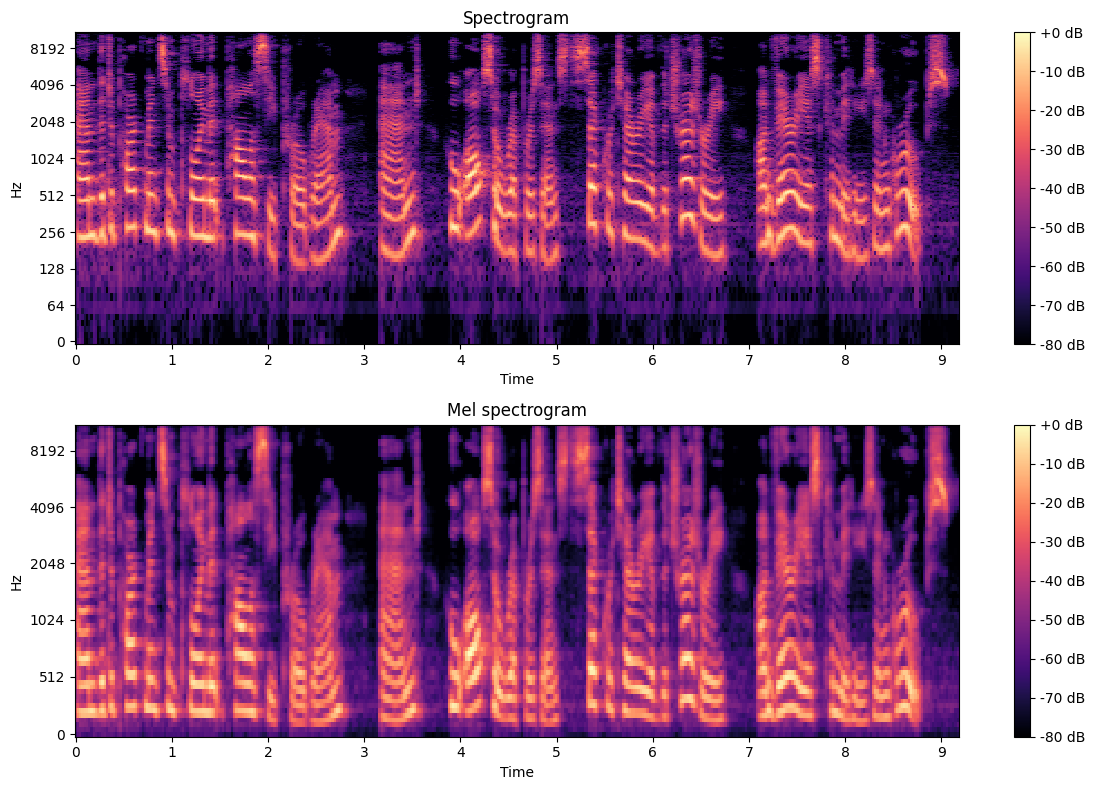

In [3]:
preprocess_test('LJ050-0013')